In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

import nltk
from nltk.corpus import stopwords

import nbimporter
import functions

from functions import (
    dendrogram,
    profile_standardized_col,
    top_profile,
    top_keywords,
    merged_df_,
    top100skills,
    database_profile,
    frontend_profile,
    qa_profile,
    ml_profile,
    fullstack_profile,
    cleaned_skills_list,
    waffle_,
    jitterplot,
    squarified_skill,
    treemap,
    heatmap,
)

# Dendrogram
import scipy.cluster.hierarchy as shc

# Waffle
from pywaffle import Waffle

# Squarify
import squarify

import warnings
warnings.filterwarnings("ignore")

SELFTIMED: 0.0019948482513427734
['javascript frontend design', 'android ios javascript', 'android developer', 'android developer developer', 'architecture developer', 'big data architecture developer', 'data architecture developer', 'software architecture developer', 'javascript python data science', 'javascript android ios', 'frontend design javascript', 'java python data science', 'php python data science']
SELFTIMED: 0.0020232200622558594
['frontend design javascript', 'javascript android ios', 'android developer', 'android developer developer', 'architecture developer', 'big data architecture developer', 'data architecture developer', 'software architecture developer', 'javascript python data science', 'android ios javascript', 'javascript frontend design', 'java python data science', 'php python data science']
SELFTIMED: 0.0
False


<IPython.core.display.Javascript object>

# overview
Dendrogram of all skills and profiles

Top Profiles<br>
Top Profile Keywords<br>
Top Skills<br>

# skills across profile types
Average num of skills seen with each developer profile<br>
Jitterplot of skills<br>
PyWaffle Distirubtion of skills between developers<br>

# looking at one profile at a time
Squarify of distribution of skills specific to developer profile

# looking at one skill at a time
Heatmap of one skill against all other skills

# Dendrogram of all skills & profiles

In [3]:
df = pd.read_csv("k_means.csv")

<IPython.core.display.Javascript object>

In [4]:
cont_bin = dendrogram(df)

<IPython.core.display.Javascript object>

In [5]:
# Skills Dendrogram
plt.figure(figsize=(80, 30), dpi=200)
dend = shc.dendrogram(
    shc.linkage(cont_bin, method="ward"),
    labels=cont_bin.index.values,
    color_threshold=100,
)
plt.savefig("skills.png")
plt.close()

<IPython.core.display.Javascript object>

**Skills Dendrogram:** ![](skills.png)

In [6]:
# Profile Dendrogram
cont_bin_T = cont_bin.transpose()
plt.figure(figsize=(80, 30), dpi=200)
dend = shc.dendrogram(
    shc.linkage(cont_bin_T, method="ward"),
    labels=cont_bin_T.index.values,
    color_threshold=100,
)
plt.savefig("profiles.png")
plt.close()

<IPython.core.display.Javascript object>

**Profiles Dendrogram:** ![](profiles.png)

# Top Profiles

In [7]:
# Open File
df = pd.read_csv("clean_talentpool.csv")

<IPython.core.display.Javascript object>

In [8]:
# Prep Data
top_profiles = pd.DataFrame(top_profile(df))

<IPython.core.display.Javascript object>

In [9]:
# Rename Columns
top_profiles.rename(
    columns={"profile_standardized": "profile", "name": "count"}, inplace=True
)

<IPython.core.display.Javascript object>

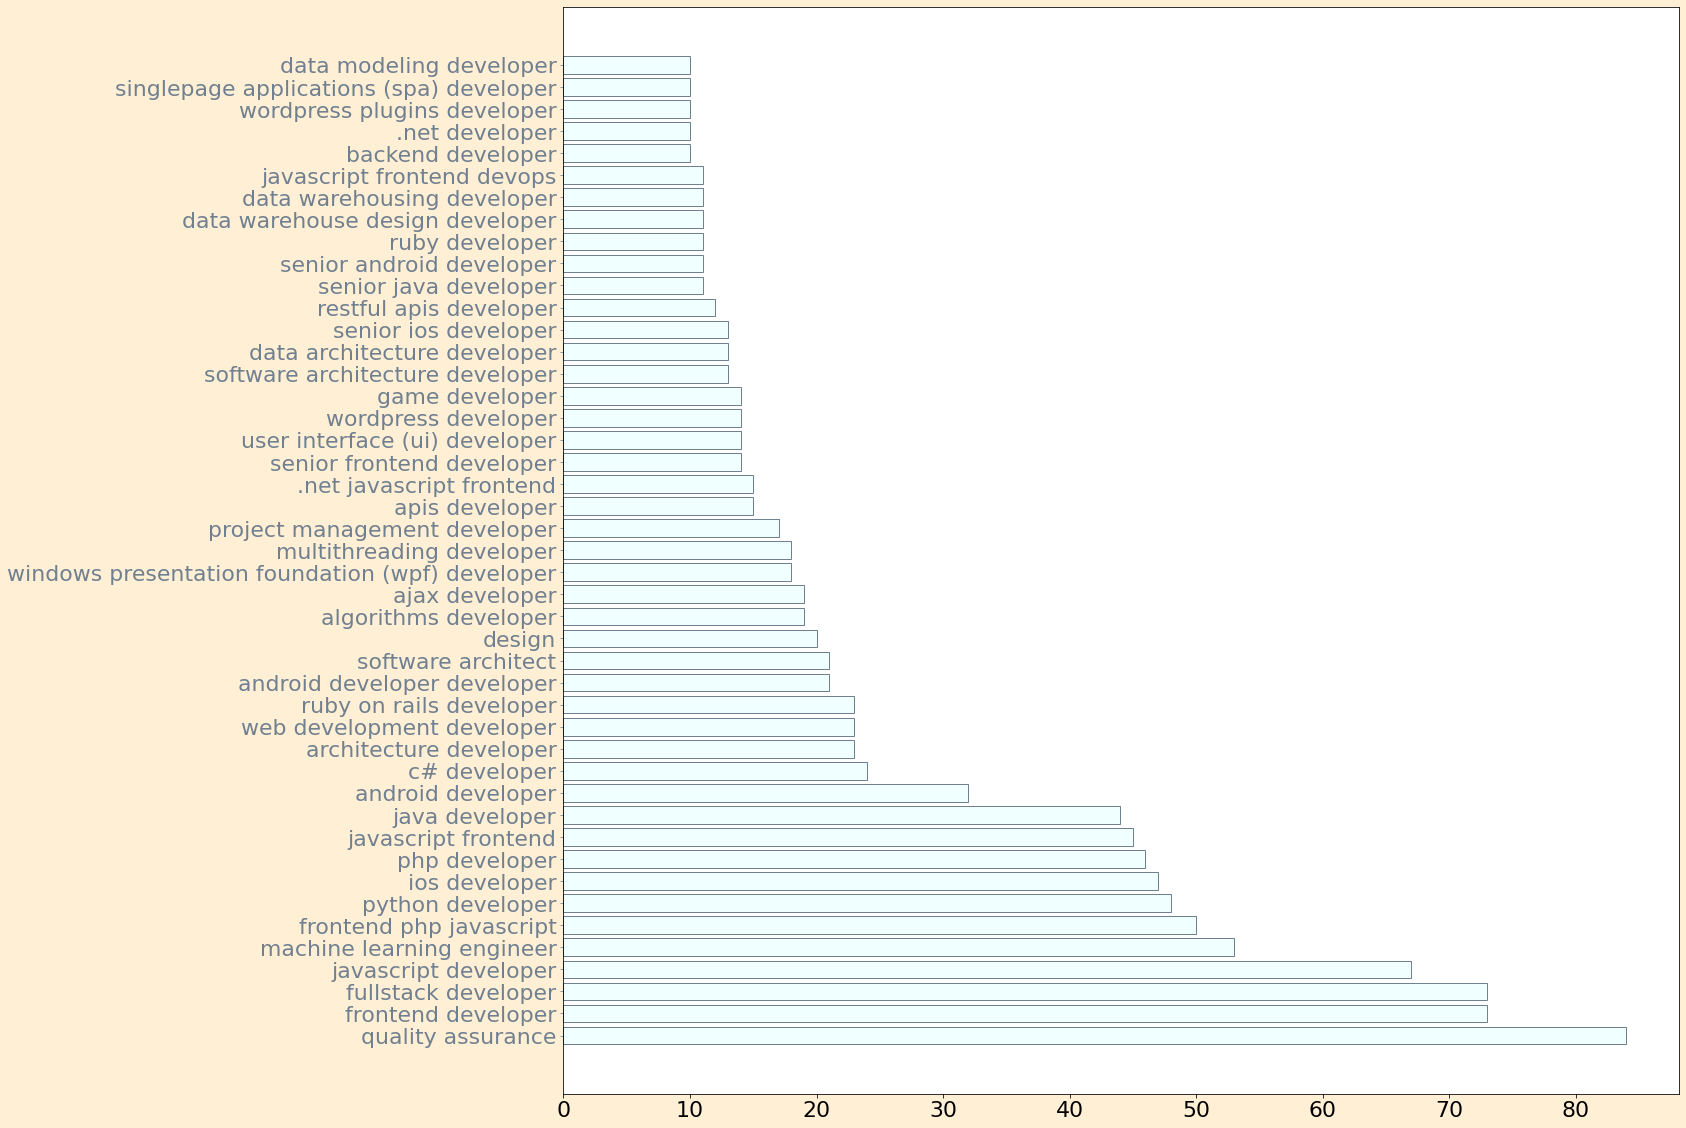

<IPython.core.display.Javascript object>

In [51]:
# Display HBar - @TODO change font!
height = top_profiles["count"]
bars = top_profiles["profile"].to_list()
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.set_yticklabels(bars)
ax.tick_params(axis="y", colors="slategrey")
fig.set_facecolor("papayawhip")
plt.barh(bars, height, color="azure", edgecolor="slategrey")
plt.rc("font", size=20)

# Top Profile Keywords

In [11]:
# Prep Data
top_keywords(df)

,profile_keywords,count
0,software,1567
1,javascript,413
2,frontend,347
3,php,163
4,fullstack,159
...,...,...
320,bootstrap,1
321,spark,1
322,(aws),1
323,amazon,1


<IPython.core.display.Javascript object>

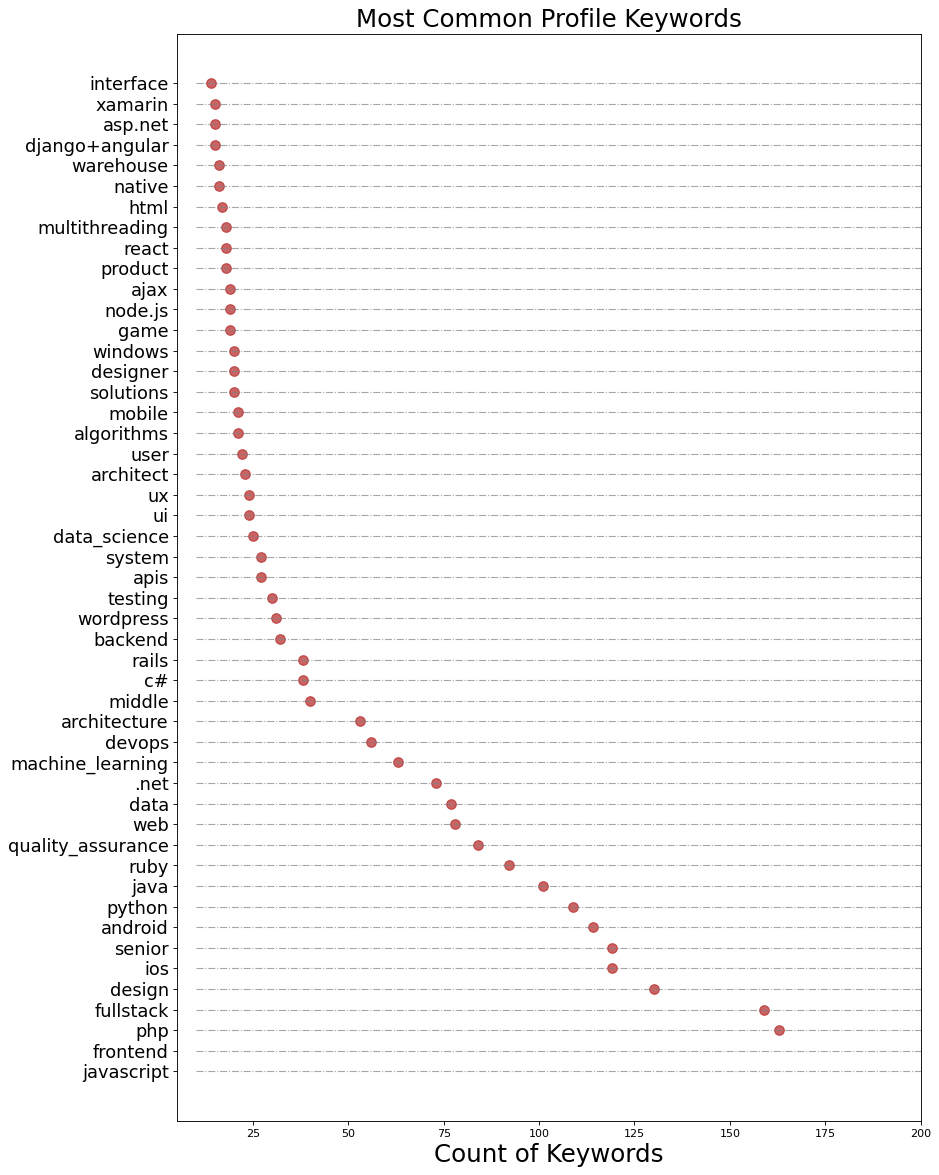

<IPython.core.display.Javascript object>

In [12]:
# Set Data
y = top_keywords(df).profile_keywords[1:50]

# Draw plot
fig, ax = plt.subplots(figsize=(12, 18), dpi=80)
ax.hlines(
    y=y,
    xmin=10,
    xmax=205,
    color="gray",
    alpha=0.7,
    linewidth=1,
    linestyles="dashdot",
)
ax.scatter(
    y=y,
    x=top_keywords(df).loc[1:49, ["count"]],
    s=75,
    color="firebrick",
    alpha=0.7,
)

# Title, Label, Ticks and Ylim
ax.set_title("Most Common Profile Keywords", fontdict={"size": "22"})
ax.set_xlabel("Count of Keywords", fontdict={"size": "22"})
ax.set_yticklabels(y, fontdict={"horizontalalignment": "right", "size": "16"})
ax.set_xlim(5, 200)
plt.show()

# Top Skills

In [13]:
# controlling for data type in skills column
df["skills"] = df["skills"].apply(lambda x: "" if type(x) == float else x)
# creating a column containing a list of skills
df["skills_list"] = df["skills"].apply(lambda x: x.split(","))
# extending the column to look at each skill individually
ex_col = df["skills_list"].explode().reset_index()
# getting unique number of skills present in dataset
ex_col["skills_list"].nunique()

788

<IPython.core.display.Javascript object>

In [14]:
comp_df_ = merged_df_(df, ex_col)

<IPython.core.display.Javascript object>

In [15]:
# Prep Data
top_100 = top100skills(df, comp_df_)
# Rename Columns
top_100.rename(columns={"index": "skills", 0: "count"}, inplace=True)
print(top_100)

          skills  count
54      python 3    423
43         html5    422
21           php    408
25       mongodb    404
11       english    392
..           ...    ...
254          vue    108
231      cordova    107
57        my sql    107
45   type script    105
90    phantom js    105

[100 rows x 2 columns]


<IPython.core.display.Javascript object>

# Average Number of Skills Across Profile Types

In [16]:
# amongst each type of developer, the average number of skills per developer group
skills_per_developer_profile = (
    comp_df_.groupby(["profile_standardized", "name"])["skills_list_x"]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

average_number_of_skills_by_group = (
    skills_per_developer_profile.groupby(["profile_standardized"])["skills_list_x"]
    .agg("mean")
    .astype(int)
    .astype(int)
    .sort_values(ascending=False)
    .reset_index()
)
average_number_of_skills_by_group.drop(36)[0:25]

,profile_standardized,skills_list_x
0,php devops management,132
1,management php javascript,131
2,marketing design management,114
3,java python javascript,113
4,javascript python frontend,111
5,javascript frontend data_science,100
6,javascript ruby management,95
7,,94
8,java python data_science,90
9,javascript python data_science,80


<IPython.core.display.Javascript object>

# Jitterplot of Skills Seen with Top Fourteen (14) Profiles

In [17]:
# Read Data
comp_df = pd.read_csv("14_profiles_uncrossed.csv")

<IPython.core.display.Javascript object>

In [18]:
# Prep Data
df = jitterplot(comp_df)

<IPython.core.display.Javascript object>

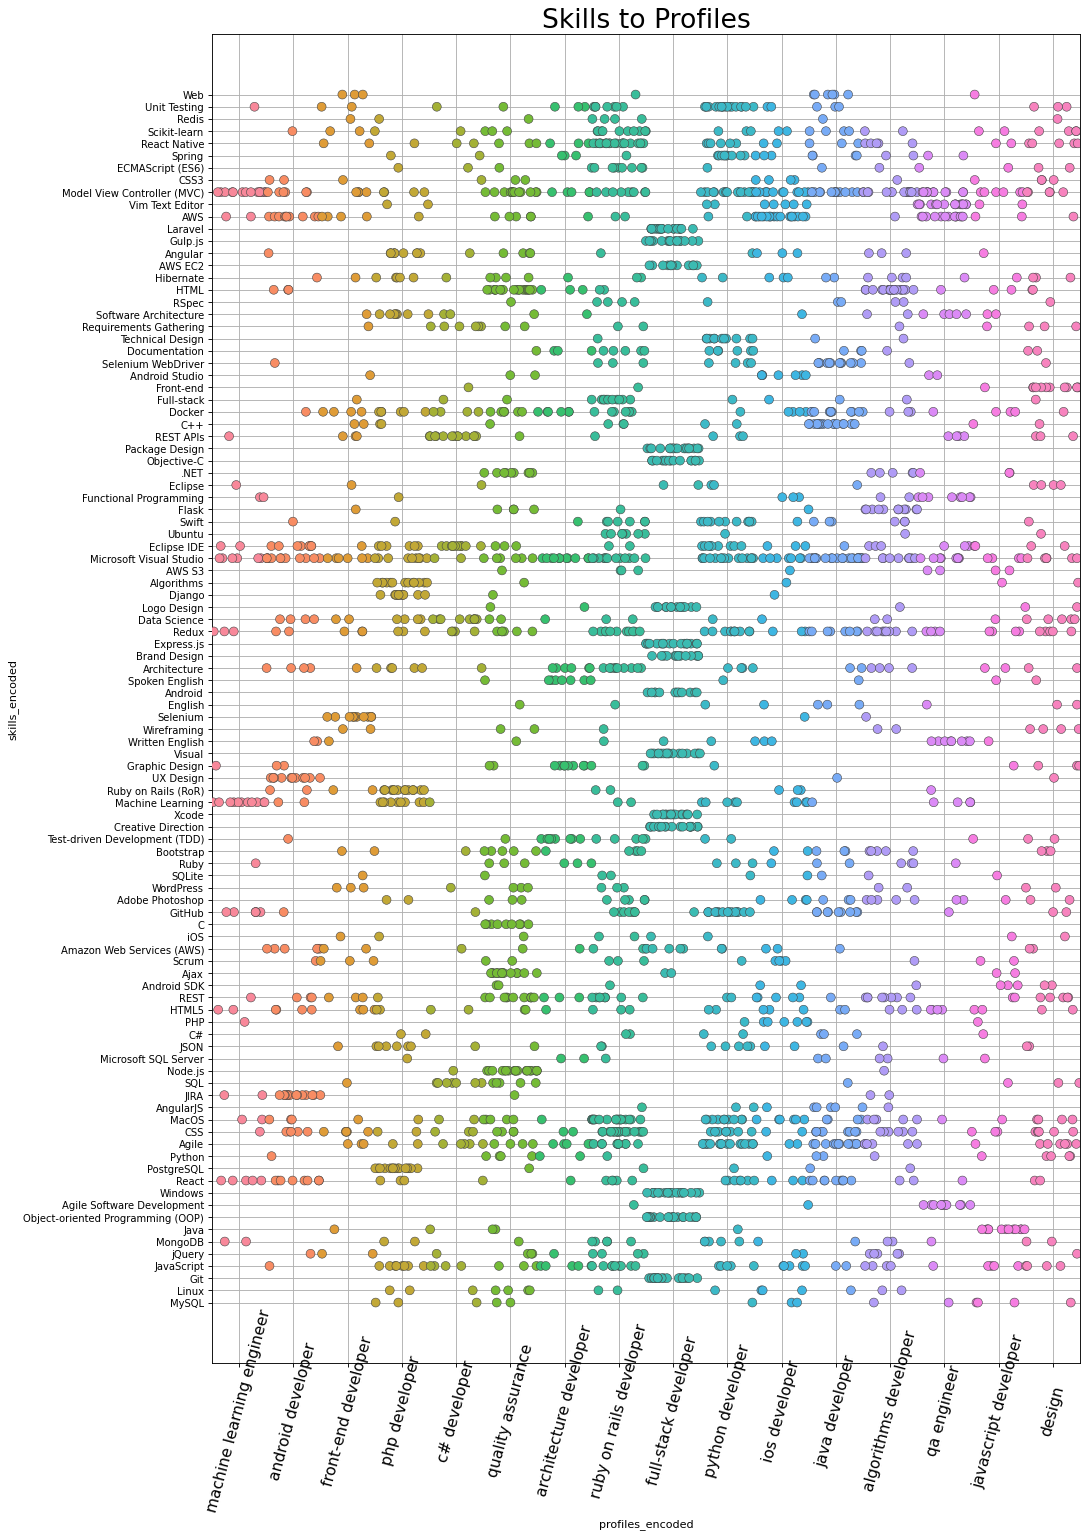

<IPython.core.display.Javascript object>

In [19]:
# Generate Jitterplot, using Encoded Skills & Profiles
fig, ax = plt.subplots(figsize=(14, 22), dpi=80)
sns.stripplot(
    x=df.profiles_encoded,
    y=df.skills_encoded,
    jitter=0.5,
    size=8,
    ax=ax,
    linewidth=0.5,
)
plt.yticks(
    range(0, len(df["skills_encoded"].unique())),
    df.skills_list_x.unique(),
    fontsize=9,
)
plt.xticks(
    range(0, len(df["profiles_encoded"].unique())),
    df.profile_standardized.unique(),
    fontsize=14,
    rotation=75,
    ha="center",
    va="center",
    position=(0, -0.03),
)
plt.title("Skills to Profiles", fontsize=24)
plt.grid(True)
# plt.figure(figsize=(22, 12))
plt.show()

# PyWaffle

In [20]:
clean_talentpool = pd.read_csv("../../clean_talentpool_eda.csv")

<IPython.core.display.Javascript object>

In [21]:
five_profiles = pd.concat(
    [
        database_profile(clean_talentpool),
        frontend_profile(clean_talentpool),
        qa_profile(clean_talentpool),
        ml_profile(clean_talentpool),
        fullstack_profile(clean_talentpool),
    ]
)

<IPython.core.display.Javascript object>

In [22]:
clean_df = cleaned_skills_list(five_profiles)

<IPython.core.display.Javascript object>

In [23]:
sub_waffle = waffle_(clean_df)

<IPython.core.display.Javascript object>

In [24]:
# Prep Data
sub_waffle = sub_waffle[1:16]
sub_waffle = sub_waffle.reset_index()
sub_waffle.skills_list = sub_waffle.skills_list.str[1:]
sub_waffle.set_index("skills_list", inplace=True)

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


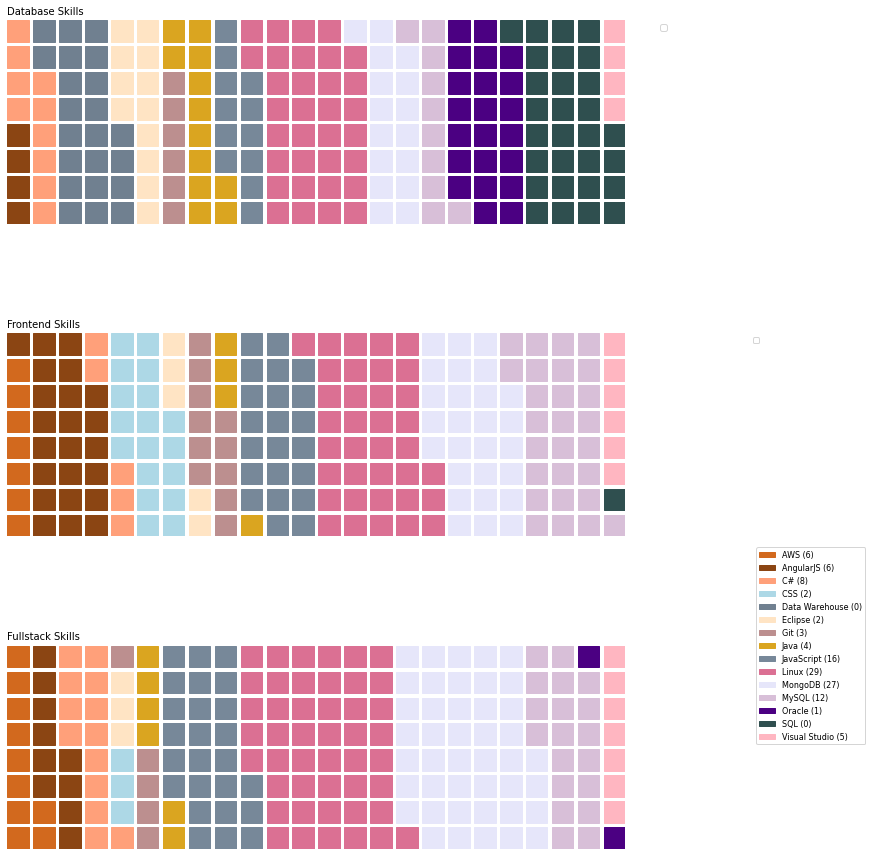

<IPython.core.display.Javascript object>

In [46]:
color = [
    "chocolate",
    "saddlebrown",
    "lightsalmon",
    "lightblue",
    "slategrey",
    "bisque",
    "rosybrown",
    "goldenrod",
    "lightslategrey",
    "palevioletred",
    "lavender",
    "thistle",
    "indigo",
    "darkslategray",
    "lightpink",
]

# waffle subplots
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        "311": {
            "values": sub_waffle["Database"],
            "legend": {
                "labels": "",
                "loc": "upper left",
                "bbox_to_anchor": (1.05, 1),
                "fontsize": 8,
            },
            "colors": color,
            "title": {"label": "Database Skills", "loc": "left", "font": "32"},
        },
        "312": {
            "values": sub_waffle["Frontend"],
            "legend": {
                "labels": "",
                "loc": "upper left",
                "bbox_to_anchor": (1.2, 1),
                "fontsize": 8,
            },
            "colors": color,
            "title": {"label": "Frontend Skills", "loc": "left", "font": "32"},
        },
        "313": {
            "values": sub_waffle["Fullstack"],
            "labels": [f"{k} ({v})" for k, v in sub_waffle["Fullstack"].items()],
            "legend": {
                "loc": "center",
                "bbox_to_anchor": (1.3, 1),
                "fontsize": 8,
            },
            "colors": color,
            "title": {"label": "Fullstack Skills", "loc": "left", "font": "32"},
        },
    },
    rows=8,
    columns=24,
    figsize=(18, 12),
)

# Squarify Skill Distribution

In [29]:
df_groupby = pd.read_csv("../../profiles_grouped_by_skills.csv")

<IPython.core.display.Javascript object>

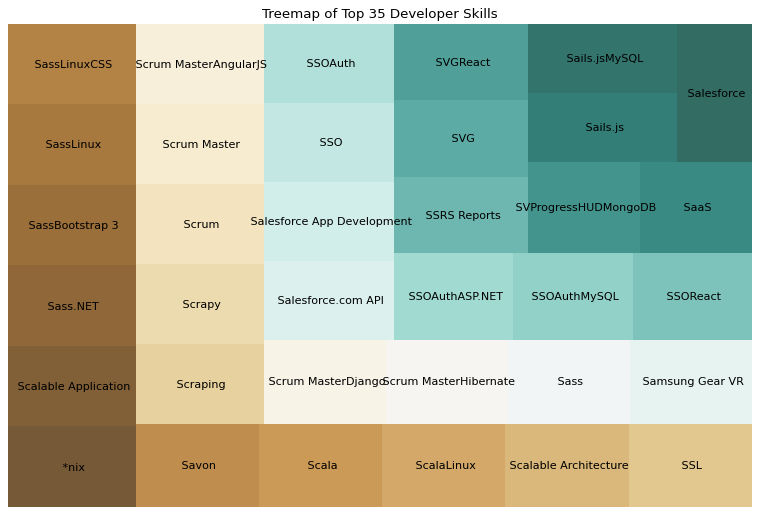

<IPython.core.display.Javascript object>

In [30]:
fullstack = squarified_skill(df_groupby, "fullstack")
treemap(fullstack)

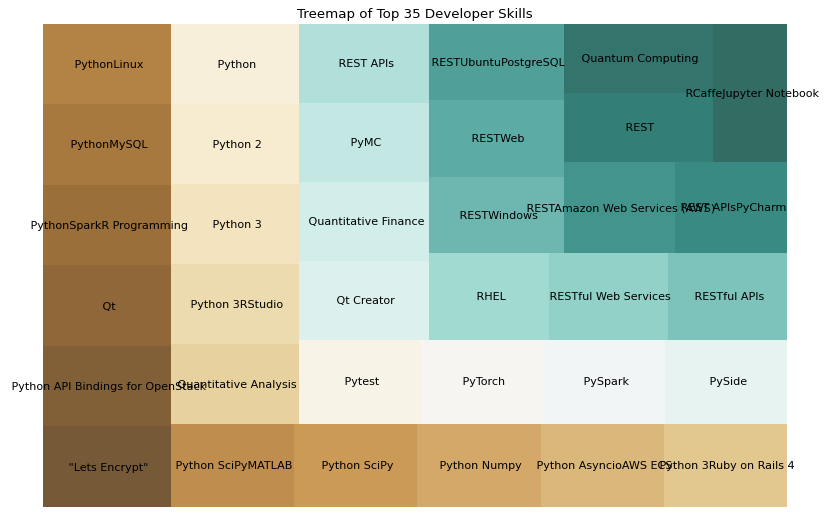

<IPython.core.display.Javascript object>

In [31]:
machine_learning = squarified_skill(df_groupby, "machine")
treemap(machine_learning)

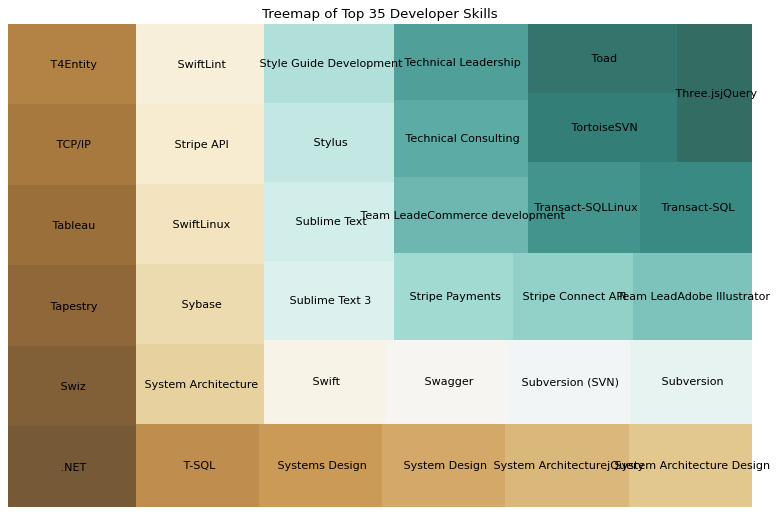

<IPython.core.display.Javascript object>

In [32]:
design = squarified_skill(df_groupby, "design")
treemap(design)

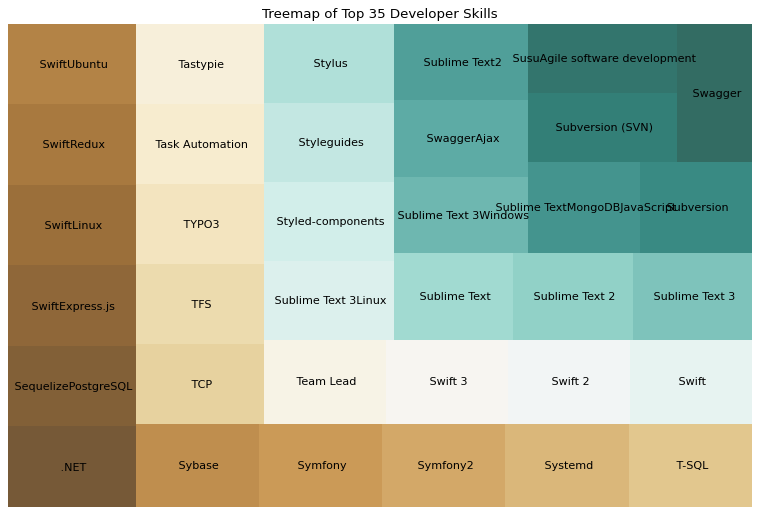

<IPython.core.display.Javascript object>

In [33]:
javascript = squarified_skill(df_groupby, "javascript")
treemap(javascript)

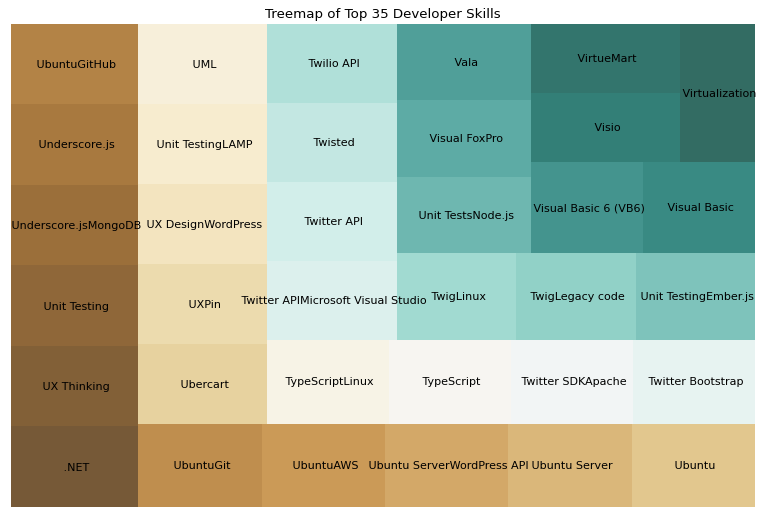

<IPython.core.display.Javascript object>

In [34]:
php = squarified_skill(df_groupby, "php")
treemap(php)

# Heatmap of Skills Against Skills

In [36]:
# reading in csv of data whose features have been reduced to yield optimal results
data = pd.read_csv("../../5_profiles/reduced_dim_5.csv")

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Showing Correlation Amongst Skills')

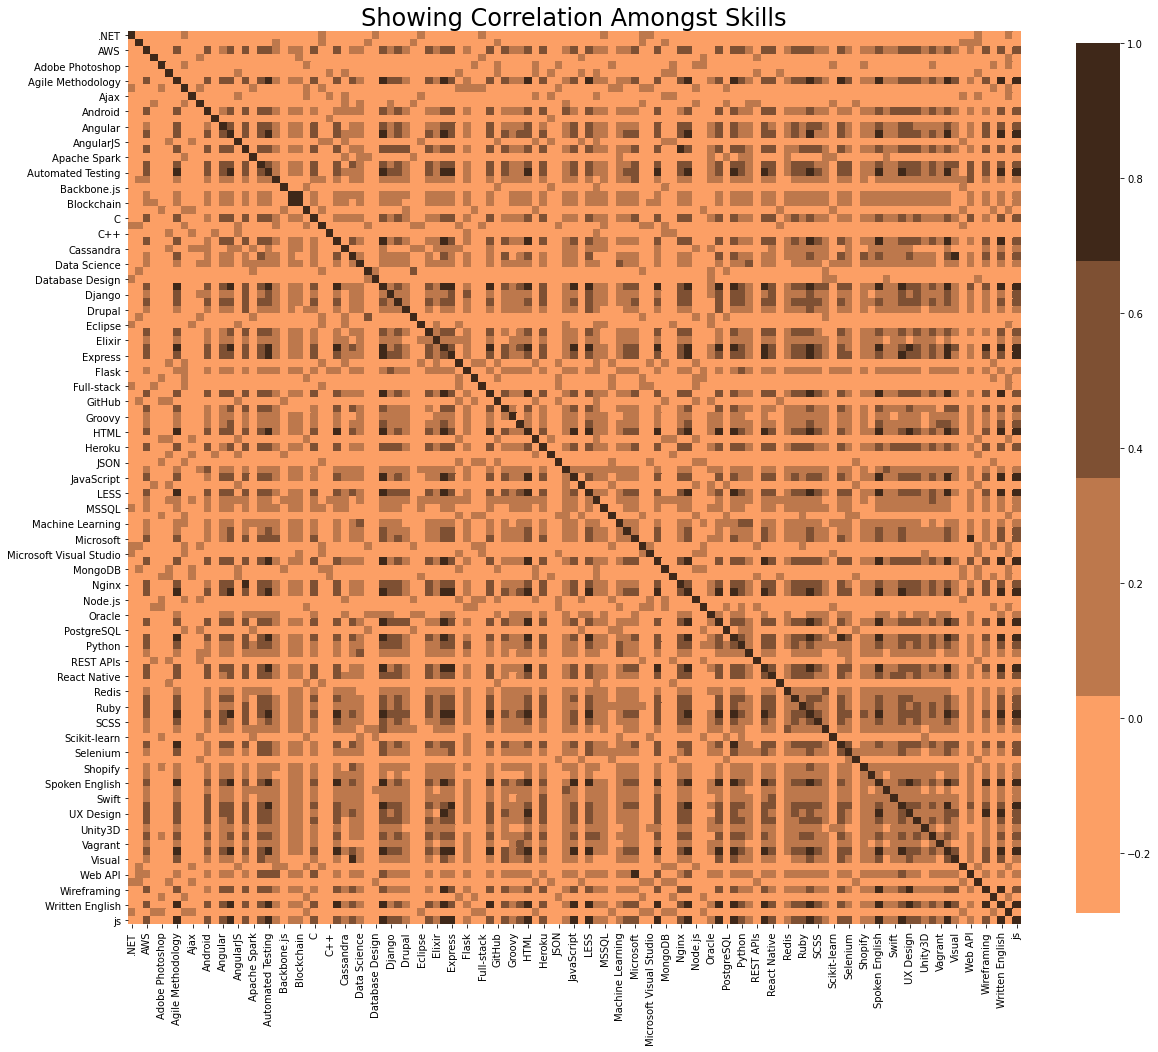

<IPython.core.display.Javascript object>

In [37]:
fig, ax = plt.subplots(figsize=(20, 20))

data_corr = data.corr()
cmap = sns.mpl_palette("copper_r", 4)

# Generate a Heatmap
sns.heatmap(data_corr, cbar_kws={"shrink": 0.8}, square=True, cmap=cmap)

# title
title = "Showing Correlation Amongst Skills"
# plt.xticks(ha="center", va="center", position=(0, -0.08), rotation=85)
plt.title(title, loc="center", fontsize=24)

### This clearly demonstrates that skills are not correlated to each other. Which means they are adding information to the dataset.

# Looking at Each Skill with a Heatmap

In [38]:
df = pd.read_csv("k_means.csv")

<IPython.core.display.Javascript object>

In [39]:
corr_matrix = heatmap(df)

<IPython.core.display.Javascript object>

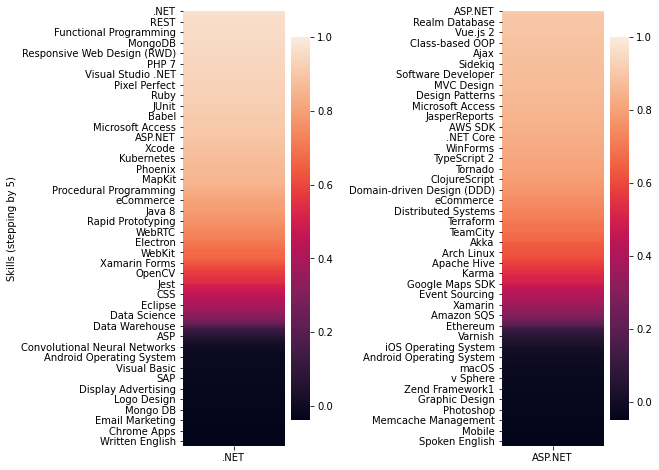

<IPython.core.display.Javascript object>

In [40]:
fig, ax = plt.subplots(
    ncols=2,
    figsize=(8, 8),
    gridspec_kw=dict(width_ratios=[3.5, 3.5]),
    constrained_layout=False,
)
# gridspec_kw=dict(width_ratios=[4,1,0.2])
a = sns.heatmap(
    corr_matrix[[".NET"]].sort_values(by=[".NET"], ascending=False),
    ax=ax[0],
)
b = sns.heatmap(
    corr_matrix[["ASP.NET"]].sort_values(by=["ASP.NET"], ascending=False),
    ax=ax[1],
)
a.set(ylabel="Skills (stepping by 5)")
b.set(ylabel=None)
a.set(xlabel=None)
b.set(xlabel=None)
plt.subplots_adjust(wspace=1.5)

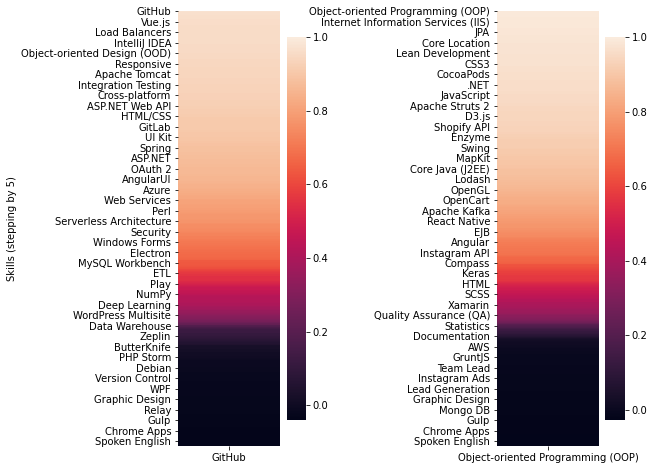

<IPython.core.display.Javascript object>

In [41]:
fig, ax = plt.subplots(
    ncols=2,
    figsize=(8, 8),
    gridspec_kw=dict(width_ratios=[3.5, 3.5]),
    constrained_layout=False,
)
# gridspec_kw=dict(width_ratios=[4,1,0.2])
a = sns.heatmap(
    corr_matrix[["GitHub"]].sort_values(by=["GitHub"], ascending=False),
    ax=ax[0],
)
b = sns.heatmap(
    corr_matrix[["Object-oriented Programming (OOP)"]].sort_values(
        by=["Object-oriented Programming (OOP)"], ascending=False
    ),
    ax=ax[1],
)
a.set(ylabel="Skills (stepping by 5)")
b.set(ylabel=None)
a.set(xlabel=None)
b.set(xlabel=None)
plt.subplots_adjust(wspace=1.5)

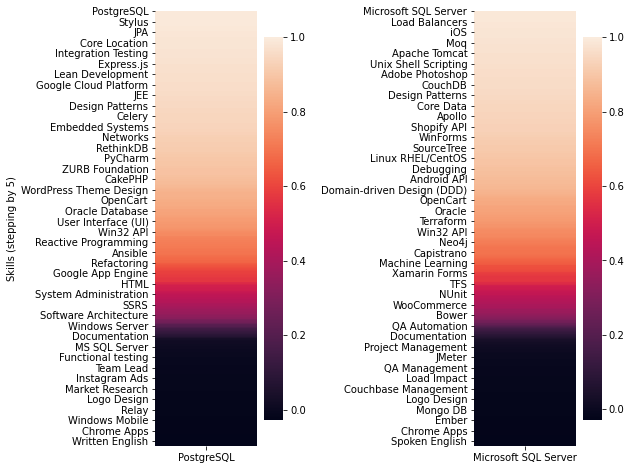

<IPython.core.display.Javascript object>

In [42]:
fig, ax = plt.subplots(
    ncols=2,
    figsize=(8, 8),
    gridspec_kw=dict(width_ratios=[3.5, 3.5]),
    constrained_layout=False,
)
# gridspec_kw=dict(width_ratios=[4,1,0.2])
a = sns.heatmap(
    corr_matrix[["PostgreSQL"]].sort_values(by=["PostgreSQL"], ascending=False),
    ax=ax[0],
)
b = sns.heatmap(
    corr_matrix[["Microsoft SQL Server"]].sort_values(
        by=["Microsoft SQL Server"], ascending=False
    ),
    ax=ax[1],
)
a.set(ylabel="Skills (stepping by 5)")
b.set(ylabel=None)
a.set(xlabel=None)
b.set(xlabel=None)
plt.subplots_adjust(wspace=1.5)